In [1]:
# !pip install pymysql
# !pip install IPython

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import math
from IPython.display import Image

2022-12-05 11:14:17.333051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
C = os.listdir('./RSP_TrainData/C/')
R = os.listdir('./RSP_TrainData/R/')
P = os.listdir('./RSP_TrainData/P/')
# N = os.listdir('./RSP_TrainData/N/')
TC = os.listdir('./RSP_TrainData/Test/C/')
TP = os.listdir('./RSP_TrainData/Test/P/')
TR = os.listdir('./RSP_TrainData/Test/R/')

In [5]:
C

['6TMYdUMhaEWHQOcc.png',
 'Y803FUXqbDOwGm0K.png',
 'uJ286TPihhYw3Y3S.png',
 'ejrBEOeknHrk4kCi.png',
 'ztTeXxuMaartlKMy.png',
 'FfCLY0qhfyOoyam8.png',
 '3kVoftgTNdDcvPPY.png',
 'Pms0QO8IsSP02WTP.png',
 'IqHedcZ3nrBRxpn6.png',
 'Sna2TBf27xfLdZgk.png',
 'IMG_2376.jpeg',
 '63khvkT3L0GCdMHh.png',
 'M5u2FmtXKSMtK8yN.png',
 'IMG_2399.jpeg',
 'svWW1IeCIfKmCxvY.png',
 'x0d1n2y61LHxML3g.png',
 'GPY2PK0wpb7ZoSVS.png',
 '2EeIeEe1P0a0Fi9v.png',
 'FEpMZLoRy5eAgRvh.png',
 'IMG_2360.jpeg',
 'qHNvtsWSBDT0FnMt.png',
 'GgA8wrylOr4pvJhZ.png',
 'ZzIlyDP6opy9ifkB.png',
 'XrNTSnUh9OxytAYI.png',
 '2TAGoXw7yaK0bXBu.png',
 'IMG_2419.jpeg',
 'OWzxS6m9SGpk1bnY.png',
 'LErff4WDwhjsYG8Z.png',
 'mAjn51U2iJwlh99P.png',
 'oYB271o4Oo5uFHpW.png',
 '1L1n6plr7jlZGirw.png',
 'JjS0KakWxwXmg5Wi.png',
 'b4Qm4ZK5AAUQo1Ax.png',
 'zdo3LHesq3aHmu1f.png',
 'IMG_2435.jpeg',
 'UPH9bl4Vrq4Gwp3K.png',
 'RTCZxs3LhwklhSKk.png',
 'BtUfOjTzw9EEvNHO.png',
 '8pCggsYVt6kUOza4.png',
 'e5dFezMV6TxIvNXA.png',
 'gzAhbz3S2W0VukHE.png',
 'GIFgGPzv

In [6]:
print(len(C))
print(len(P))
print(len(R))
# print(len(N))
print(len(TC))
print(len(TP))
print(len(TR))

920
916
927
1
1
1


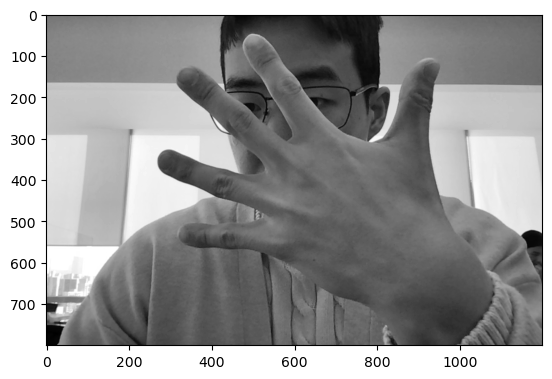

In [7]:
src = cv2.imread(f'./RSP_TrainData/Test/P/P.jpg')
src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)



plt.imshow(src, cmap='gray')

In [8]:
for idx, c in enumerate(C) :
    globals()[f'C{idx}'] = cv2.imread(f'./RSP_TrainData/C/{c}')

## 이미지 파일을 새롭게 저장
> EX) C0 ~ C10 <br>
각각의 리스트로 저장

In [9]:
def saveDir(x, name, option) : 
    li = []
    
    for idx, y in enumerate(x) :
        if option == "train" :
            src = cv2.imread(f'./RSP_TrainData/{name}/{y}')
            src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        elif option == "test" :
            src = cv2.imread(f'./RSP_TrainData/Test/{name}/{y}')
            src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
        else : 
            print("check option")
            break
        
        blur = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0)
        gap = src-blur
        src = src + gap
        
        globals()[f'{name}{idx}'] = cv2.resize(src, dsize=(300, 200), interpolation=cv2.INTER_AREA)

        li.append(globals()[f'{name}{idx}'])
    
    if option == "train" :
        globals()[f'np{name}'] = np.array([li])
        globals()[f'np{name}'] = globals()[f'np{name}'].reshape(len(globals()[f'np{name}'][0]),
                                                               len(globals()[f'np{name}'][0][0]),
                                                               len(globals()[f'np{name}'][0][0][0]))
    elif option == "test" :
        globals()[f'npT{name}'] = np.array([li])
        globals()[f'npT{name}'] = globals()[f'npT{name}'].reshape(len(globals()[f'npT{name}'][0]),
                                                               len(globals()[f'npT{name}'][0][0]),
                                                               len(globals()[f'npT{name}'][0][0][0]))
    


In [10]:
saveDir(R, "R", "train")
saveDir(C, "C", "train")
saveDir(P, "P", "train")
# saveDir(N, "N")
saveDir(TC, "C", "test")
saveDir(TP, "P", "test")
saveDir(TR, "R", "test")

print(npC.shape)
print(npP.shape)
print(npR.shape)
print(npTC.shape)
print(npTP.shape)
print(npTR.shape)

(920, 200, 300)
(916, 200, 300)
(927, 200, 300)
(1, 200, 300)
(1, 200, 300)
(1, 200, 300)


In [11]:
def makeY(x, name, num, option): 
    li = []
    for i in range(len(x)):
        li.append(num)
        if option == "train" :
            globals()[f'npYTr{name}'] = np.array([li])
            globals()[f'npYTr{name}'] = globals()[f'npYTr{name}'].reshape(len(globals()[f'npYTr{name}'][0]))
        elif option == "test" :
            globals()[f'npYTs{name}'] = np.array([li])
            globals()[f'npYTs{name}'] = globals()[f'npYTs{name}'].reshape(len(globals()[f'npYTs{name}'][0]))
        else :
            print("check optinon")
            break
        

In [12]:
makeY(npR, "R", 0, "train")
makeY(npC, "C", 1, "train")
makeY(npP, "P", 2, "train")
# makeYTrain(npN, "N", 3)
makeY(npTR, "R", 0, "test")
makeY(npTC, "C", 1, "test")
makeY(npTP, "P", 2, "test")


In [13]:
# Train
print(npYTrC.shape)
print(npYTrR.shape)
print(npYTrP.shape)
# print(npYN.shape)

# Test
print(npYTsC.shape)
print(npYTsR.shape)
print(npYTsP.shape)

(920,)
(927,)
(916,)
(1,)
(1,)
(1,)


## Train Data set.

In [14]:
X_train = np.vstack([npR, npC, npP]) # npN
y_train = np.hstack([npYTrR, npYTrC, npYTrP]) # npYN

X_test = np.vstack([npTR, npTC, npTP])
y_test = np.hstack([npYTsR, npYTsC, npYTsP]) # npYN
print("Before separation")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("\n+ Transform 3D tensor")
print("X_train.shape : ",X_train.shape)
print("X_test.shape : ",X_test.shape)



# 카테고리 컬
y_trn = to_categorical(y_train)
y_ts = to_categorical(y_test)
print(y_trn[0])
print(y_ts[0])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=19)
print("\nAfter separation")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_trn = to_categorical(y_train)
y_ts = to_categorical(y_test)
print(y_trn[0])
print(y_ts[0])
print("y_ts.shape :", y_ts.shape)


Before separation
(2763, 200, 300)
(2763,)
(3, 200, 300)
(3,)

+ Transform 3D tensor
X_train.shape :  (2763, 200, 300, 1)
X_test.shape :  (3, 200, 300, 1)
[1. 0. 0.]
[1. 0. 0.]

After separation
(2210, 200, 300, 1)
(2210,)
(553, 200, 300, 1)
(553,)
[0. 1. 0.]
[1. 0. 0.]
y_ts.shape : (553, 3)


## Model Set


In [15]:
i_shapes = X_train.shape[1:]

model1 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=i_shapes),
    tf.keras.layers.Dense(3, activation='softmax')
])
model2 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=i_shapes),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model3 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=i_shapes),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model4 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=i_shapes),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
# CNN Model.
model5 = tf.keras.models.Sequential([         
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=i_shapes),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model6 = tf.keras.models.Sequential([         
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=i_shapes),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((4,4)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='elu'),    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])


 # 결론 : 히든레이어를 많이 넣을 필요가 없다.

2022-12-05 11:15:39.385822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 모데 학습 및 평가 함수 생성

In [16]:
# EarlyStopping Callback 정의하기
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)
# 성능이 좋아지는것 보다는 시간을 단축하겠다는 개념

In [29]:
# from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, my_callback) : # + best model select.

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #No OneHot Encoding
              metrics=['acc'])
    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=20, verbose=1,
        validation_data=0.2, callbacks=[my_callback, save_best_model]) 
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

In [30]:
y_train[1]

1

## 모델 학습 실행

In [31]:
mdList = [model1, model2, model3, model4, model5, model6] # 

for num, model in enumerate(mdList):
    mdFit(model, num, X_train, y_trn)
    
# accuracy가 높고, val_accuracy가 낮으면 과적합 판단.

# batchsize를 줄여야 커널 터지는걸 방지 할 수 있다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 60000)             0         
                                                                 
 dense (Dense)               (None, 3)                 180003    
                                                                 
Total params: 180,003
Trainable params: 180,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/20 [=======================>......] - ETA: 0s - loss: 1844.8322 - accuracy: 0.5056INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 36ms/step - loss: 1576.8618 - accuracy: 0.5118 - val_loss: 858.6515 - val_accuracy: 0.4389
Epoch 2/30
19/20 [===========================>..] - ETA: 0s - loss: 235.1418 - accuracy: 0.6453INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 35ms/step - loss: 230.7783 - accuracy: 0.6506 - val_loss: 535.8729 - val_accuracy: 0.4253
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 180.7502 - accuracy: 0.6742INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 34ms/step - loss: 180.7502 - accuracy: 0.6742 - val_loss: 307.5786 - val_accuracy: 0.6018
Epoch 4/30
16/20 [=======================>......] - ETA: 0s - loss: 163.8335 - accuracy: 0.7013INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 31ms/step - loss: 154.8969 - accuracy: 0.7034 - val_loss: 305.0341 - val_accuracy: 0.6018
Epoch 5/30
20/20 [==============================] - 0s 13ms/step - loss: 208.4722 - accuracy: 0.6571 - val_loss: 336.8312 - val_accuracy: 0.5882
Epoch 6/30
20/20 [==============================] - ETA: 0s - loss: 144.7396 - accuracy: 0.6988INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 30ms/step - loss: 144.7396 - accuracy: 0.6988 - val_loss: 302.8081 - val_accuracy: 0.5882
Epoch 7/30
20/20 [==============================] - 0s 14ms/step - loss: 198.9977 - accuracy: 0.6440 - val_loss: 311.2967 - val_accuracy: 0.5928
Epoch 8/30
16/20 [=======================>......] - ETA: 0s - loss: 146.4388 - accuracy: 0.7106INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 33ms/step - loss: 142.0144 - accuracy: 0.7074 - val_loss: 300.6983 - val_accuracy: 0.5928
Epoch 9/30
16/20 [=======================>......] - ETA: 0s - loss: 188.6519 - accuracy: 0.6619INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 31ms/step - loss: 190.9220 - accuracy: 0.6606 - val_loss: 261.5317 - val_accuracy: 0.6380
Epoch 10/30
20/20 [==============================] - 0s 13ms/step - loss: 219.2433 - accuracy: 0.6355 - val_loss: 305.9899 - val_accuracy: 0.6154
Epoch 11/30
20/20 [==============================] - 0s 14ms/step - loss: 182.2038 - accuracy: 0.6828 - val_loss: 612.0022 - val_accuracy: 0.4480
Epoch 12/30
20/20 [==============================] - 0s 13ms/step - loss: 168.4684 - accuracy: 0.6868 - val_loss: 473.0189 - val_accuracy: 0.4525
Epoch 13/30
20/20 [==============================] - 0s 13ms/step - loss: 178.0226 - accuracy: 0.6591 - val_loss: 415.1250 - val_accuracy: 0.5113
Epoch 14/30
20/20 [==============================] - 0s 13ms/step - loss: 224.3984 - accuracy: 0.6425 - val_loss: 276.6330 - val_accuracy: 0.6335
Epoch 15/30
20/20 [==============================] - 0s 13ms/step - loss: 357.1822 - accuracy: 0.5747 - val_loss: 295.1176 - val_accurac

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model0/assets


20/20 [==============================] - 1s 28ms/step - loss: 64.5882 - accuracy: 0.7919 - val_loss: 253.0056 - val_accuracy: 0.6109
Epoch 21/30
20/20 [==============================] - 0s 13ms/step - loss: 277.7447 - accuracy: 0.6078 - val_loss: 766.2253 - val_accuracy: 0.3756
Epoch 22/30
20/20 [==============================] - 0s 13ms/step - loss: 300.8029 - accuracy: 0.5807 - val_loss: 298.9668 - val_accuracy: 0.6199
Epoch 23/30
20/20 [==============================] - 0s 13ms/step - loss: 216.8332 - accuracy: 0.6254 - val_loss: 356.0992 - val_accuracy: 0.5566
Epoch 24/30
20/20 [==============================] - 0s 13ms/step - loss: 139.7802 - accuracy: 0.7205 - val_loss: 365.6824 - val_accuracy: 0.5611
Epoch 25/30
20/20 [==============================] - 0s 13ms/step - loss: 74.1106 - accuracy: 0.7939 - val_loss: 289.2945 - val_accuracy: 0.5837
Epoch 26/30
20/20 [==============================] - 0s 13ms/step - loss: 165.9011 - accuracy: 0.6581 - val_loss: 539.3305 - val_accuracy:

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 2s 83ms/step - loss: 427.0523 - accuracy: 0.4314 - val_loss: 125.9128 - val_accuracy: 0.3303
Epoch 2/30
19/20 [===========================>..] - ETA: 0s - loss: 80.5524 - accuracy: 0.4716INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 1s 77ms/step - loss: 78.3342 - accuracy: 0.4771 - val_loss: 55.2479 - val_accuracy: 0.4751
Epoch 3/30
19/20 [===========================>..] - ETA: 0s - loss: 27.9220 - accuracy: 0.6258INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 2s 78ms/step - loss: 27.3390 - accuracy: 0.6305 - val_loss: 28.7150 - val_accuracy: 0.6335
Epoch 4/30
20/20 [==============================] - 1s 40ms/step - loss: 11.2367 - accuracy: 0.7406 - val_loss: 39.3100 - val_accuracy: 0.5068
Epoch 5/30
20/20 [==============================] - 1s 39ms/step - loss: 13.5947 - accuracy: 0.6913 - val_loss: 34.6301 - val_accuracy: 0.5249
Epoch 6/30
20/20 [==============================] - 1s 38ms/step - loss: 22.7746 - accuracy: 0.5968 - val_loss: 45.3505 - val_accuracy: 0.4842
Epoch 7/30
19/20 [===========================>..] - ETA: 0s - loss: 19.4785 - accuracy: 0.6474INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 1s 76ms/step - loss: 19.3758 - accuracy: 0.6471 - val_loss: 23.6359 - val_accuracy: 0.6425
Epoch 8/30
20/20 [==============================] - 1s 38ms/step - loss: 24.7147 - accuracy: 0.5817 - val_loss: 69.3947 - val_accuracy: 0.4751
Epoch 9/30
20/20 [==============================] - 1s 39ms/step - loss: 25.9613 - accuracy: 0.6179 - val_loss: 53.6564 - val_accuracy: 0.4842
Epoch 10/30
20/20 [==============================] - 1s 39ms/step - loss: 22.6325 - accuracy: 0.6280 - val_loss: 46.7662 - val_accuracy: 0.5294
Epoch 11/30
20/20 [==============================] - 1s 40ms/step - loss: 20.1475 - accuracy: 0.6405 - val_loss: 33.2146 - val_accuracy: 0.5747
Epoch 12/30
20/20 [==============================] - 1s 40ms/step - loss: 47.3548 - accuracy: 0.5867 - val_loss: 141.1594 - val_accuracy: 0.3213
Epoch 13/30
20/20 [==============================] - 1s 39ms/step - loss: 55.3796 - accuracy: 0.4681 - val_loss: 36.5403 - val_accuracy: 0.5068
Epoch

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 1s 74ms/step - loss: 10.7625 - accuracy: 0.7185 - val_loss: 22.7384 - val_accuracy: 0.6109
Epoch 21/30
19/20 [===========================>..] - ETA: 0s - loss: 8.6208 - accuracy: 0.7200INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 1s 75ms/step - loss: 8.6772 - accuracy: 0.7185 - val_loss: 21.0409 - val_accuracy: 0.6425
Epoch 22/30
20/20 [==============================] - 1s 38ms/step - loss: 19.0764 - accuracy: 0.6214 - val_loss: 33.5857 - val_accuracy: 0.5611
Epoch 23/30
20/20 [==============================] - 1s 38ms/step - loss: 10.6192 - accuracy: 0.7079 - val_loss: 24.0365 - val_accuracy: 0.5882
Epoch 24/30
20/20 [==============================] - 1s 38ms/step - loss: 16.3501 - accuracy: 0.6224 - val_loss: 41.4182 - val_accuracy: 0.4163
Epoch 25/30
19/20 [===========================>..] - ETA: 0s - loss: 12.2732 - accuracy: 0.6789INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model1/assets


20/20 [==============================] - 1s 74ms/step - loss: 12.2004 - accuracy: 0.6797 - val_loss: 19.7919 - val_accuracy: 0.6425
Epoch 26/30
20/20 [==============================] - 1s 38ms/step - loss: 15.7975 - accuracy: 0.6300 - val_loss: 55.5013 - val_accuracy: 0.3439
Epoch 27/30
20/20 [==============================] - 1s 39ms/step - loss: 28.8575 - accuracy: 0.5666 - val_loss: 29.9805 - val_accuracy: 0.5385
Epoch 28/30
20/20 [==============================] - 1s 40ms/step - loss: 39.9063 - accuracy: 0.4987 - val_loss: 68.2340 - val_accuracy: 0.4118
Epoch 29/30
20/20 [==============================] - 1s 39ms/step - loss: 34.8510 - accuracy: 0.5535 - val_loss: 27.2804 - val_accuracy: 0.5792
Epoch 30/30
20/20 [==============================] - 1s 39ms/step - loss: 12.4689 - accuracy: 0.7024 - val_loss: 30.8829 - val_accuracy: 0.5385
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 85ms/step - loss: 208.8682 - accuracy: 0.3791 - val_loss: 56.2494 - val_accuracy: 0.3394
Epoch 2/30
19/20 [===========================>..] - ETA: 0s - loss: 37.7966 - accuracy: 0.4053INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 83ms/step - loss: 37.2478 - accuracy: 0.4098 - val_loss: 31.3709 - val_accuracy: 0.4253
Epoch 3/30
19/20 [===========================>..] - ETA: 0s - loss: 22.1518 - accuracy: 0.4721INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 78ms/step - loss: 21.8872 - accuracy: 0.4696 - val_loss: 17.6381 - val_accuracy: 0.4615
Epoch 4/30
19/20 [===========================>..] - ETA: 0s - loss: 6.2704 - accuracy: 0.5326INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 79ms/step - loss: 6.2062 - accuracy: 0.5309 - val_loss: 8.3898 - val_accuracy: 0.4525
Epoch 5/30
19/20 [===========================>..] - ETA: 0s - loss: 5.4190 - accuracy: 0.4963INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 1s 75ms/step - loss: 5.3295 - accuracy: 0.4932 - val_loss: 7.4152 - val_accuracy: 0.4570
Epoch 6/30
20/20 [==============================] - 1s 39ms/step - loss: 4.9354 - accuracy: 0.5189 - val_loss: 7.5093 - val_accuracy: 0.4661
Epoch 7/30
20/20 [==============================] - 1s 38ms/step - loss: 5.2603 - accuracy: 0.5063 - val_loss: 11.5878 - val_accuracy: 0.3665
Epoch 8/30
19/20 [===========================>..] - ETA: 0s - loss: 3.6371 - accuracy: 0.5021INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 79ms/step - loss: 3.5688 - accuracy: 0.5008 - val_loss: 7.1596 - val_accuracy: 0.4661
Epoch 9/30
20/20 [==============================] - 1s 40ms/step - loss: 4.5317 - accuracy: 0.4796 - val_loss: 8.3522 - val_accuracy: 0.3846
Epoch 10/30
20/20 [==============================] - 1s 39ms/step - loss: 6.9252 - accuracy: 0.4510 - val_loss: 7.7673 - val_accuracy: 0.3891
Epoch 11/30
19/20 [===========================>..] - ETA: 0s - loss: 3.5714 - accuracy: 0.4574INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 79ms/step - loss: 3.5408 - accuracy: 0.4555 - val_loss: 4.0843 - val_accuracy: 0.4525
Epoch 12/30
19/20 [===========================>..] - ETA: 0s - loss: 2.8252 - accuracy: 0.4674INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 78ms/step - loss: 2.8027 - accuracy: 0.4686 - val_loss: 3.5963 - val_accuracy: 0.4615
Epoch 13/30
19/20 [===========================>..] - ETA: 0s - loss: 1.6697 - accuracy: 0.5311INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 97ms/step - loss: 1.6527 - accuracy: 0.5289 - val_loss: 2.4957 - val_accuracy: 0.4887
Epoch 14/30
20/20 [==============================] - 1s 38ms/step - loss: 1.3608 - accuracy: 0.5068 - val_loss: 2.5760 - val_accuracy: 0.4570
Epoch 15/30
19/20 [===========================>..] - ETA: 0s - loss: 1.2018 - accuracy: 0.5384INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 1s 77ms/step - loss: 1.1942 - accuracy: 0.5380 - val_loss: 2.2933 - val_accuracy: 0.4887
Epoch 16/30
19/20 [===========================>..] - ETA: 0s - loss: 1.2178 - accuracy: 0.4953INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 78ms/step - loss: 1.2253 - accuracy: 0.4942 - val_loss: 2.0288 - val_accuracy: 0.4796
Epoch 17/30
20/20 [==============================] - 1s 39ms/step - loss: 1.1952 - accuracy: 0.4847 - val_loss: 2.0968 - val_accuracy: 0.4344
Epoch 18/30
19/20 [===========================>..] - ETA: 0s - loss: 1.0985 - accuracy: 0.5226INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 83ms/step - loss: 1.0925 - accuracy: 0.5249 - val_loss: 1.8086 - val_accuracy: 0.4615
Epoch 19/30
20/20 [==============================] - 1s 40ms/step - loss: 1.0458 - accuracy: 0.5204 - val_loss: 1.8864 - val_accuracy: 0.4299
Epoch 20/30
20/20 [==============================] - 1s 39ms/step - loss: 1.1911 - accuracy: 0.4937 - val_loss: 2.2760 - val_accuracy: 0.3529
Epoch 21/30
19/20 [===========================>..] - ETA: 0s - loss: 1.0765 - accuracy: 0.5389INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 87ms/step - loss: 1.0660 - accuracy: 0.5380 - val_loss: 1.4655 - val_accuracy: 0.4842
Epoch 22/30
20/20 [==============================] - 1s 42ms/step - loss: 0.8430 - accuracy: 0.5777 - val_loss: 1.5069 - val_accuracy: 0.5204
Epoch 23/30
19/20 [===========================>..] - ETA: 0s - loss: 0.8552 - accuracy: 0.5558INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 81ms/step - loss: 0.8501 - accuracy: 0.5601 - val_loss: 1.4426 - val_accuracy: 0.4796
Epoch 24/30
20/20 [==============================] - 1s 39ms/step - loss: 0.8429 - accuracy: 0.5591 - val_loss: 1.4492 - val_accuracy: 0.4796
Epoch 25/30
20/20 [==============================] - 1s 38ms/step - loss: 0.8666 - accuracy: 0.5485 - val_loss: 1.4971 - val_accuracy: 0.4751
Epoch 26/30
19/20 [===========================>..] - ETA: 0s - loss: 0.9585 - accuracy: 0.5258INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model2/assets


20/20 [==============================] - 2s 83ms/step - loss: 0.9571 - accuracy: 0.5249 - val_loss: 1.3816 - val_accuracy: 0.4480
Epoch 27/30
20/20 [==============================] - 1s 39ms/step - loss: 0.8418 - accuracy: 0.5671 - val_loss: 1.4239 - val_accuracy: 0.5068
Epoch 28/30
20/20 [==============================] - 1s 41ms/step - loss: 0.8221 - accuracy: 0.5762 - val_loss: 1.5830 - val_accuracy: 0.4751
Epoch 29/30
20/20 [==============================] - 1s 41ms/step - loss: 0.9903 - accuracy: 0.5299 - val_loss: 1.6150 - val_accuracy: 0.4344
Epoch 30/30
20/20 [==============================] - 1s 38ms/step - loss: 0.9018 - accuracy: 0.5525 - val_loss: 1.3993 - val_accuracy: 0.4615
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 60000)             0         
                                                                 
 dense_3 (Dense)

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 89ms/step - loss: 204.1897 - accuracy: 0.3620 - val_loss: 93.1332 - val_accuracy: 0.3394
Epoch 2/30
19/20 [===========================>..] - ETA: 0s - loss: 90.8810 - accuracy: 0.3800INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 80ms/step - loss: 89.9709 - accuracy: 0.3756 - val_loss: 32.4064 - val_accuracy: 0.3575
Epoch 3/30
19/20 [===========================>..] - ETA: 0s - loss: 28.5985 - accuracy: 0.4542INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 87ms/step - loss: 28.2577 - accuracy: 0.4510 - val_loss: 29.7714 - val_accuracy: 0.4887
Epoch 4/30
19/20 [===========================>..] - ETA: 0s - loss: 16.9171 - accuracy: 0.5384INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 84ms/step - loss: 16.8608 - accuracy: 0.5385 - val_loss: 15.3280 - val_accuracy: 0.5837
Epoch 5/30
20/20 [==============================] - 1s 38ms/step - loss: 16.8326 - accuracy: 0.5304 - val_loss: 21.9310 - val_accuracy: 0.4299
Epoch 6/30
19/20 [===========================>..] - ETA: 0s - loss: 14.7408 - accuracy: 0.5247INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 88ms/step - loss: 14.3676 - accuracy: 0.5294 - val_loss: 13.8557 - val_accuracy: 0.4932
Epoch 7/30
19/20 [===========================>..] - ETA: 0s - loss: 12.9269 - accuracy: 0.4963INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 80ms/step - loss: 12.5293 - accuracy: 0.5058 - val_loss: 13.2963 - val_accuracy: 0.4163
Epoch 8/30
20/20 [==============================] - 1s 38ms/step - loss: 14.7995 - accuracy: 0.4711 - val_loss: 19.7492 - val_accuracy: 0.4299
Epoch 9/30
19/20 [===========================>..] - ETA: 0s - loss: 10.8414 - accuracy: 0.5411INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 99ms/step - loss: 10.8837 - accuracy: 0.5365 - val_loss: 12.8202 - val_accuracy: 0.5339
Epoch 10/30
19/20 [===========================>..] - ETA: 0s - loss: 9.4971 - accuracy: 0.5405INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 81ms/step - loss: 9.5763 - accuracy: 0.5390 - val_loss: 7.0859 - val_accuracy: 0.6154
Epoch 11/30
19/20 [===========================>..] - ETA: 0s - loss: 6.2043 - accuracy: 0.6084INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 81ms/step - loss: 6.0661 - accuracy: 0.6124 - val_loss: 6.5113 - val_accuracy: 0.6018
Epoch 12/30
19/20 [===========================>..] - ETA: 0s - loss: 3.2953 - accuracy: 0.6663INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 85ms/step - loss: 3.2605 - accuracy: 0.6672 - val_loss: 6.3178 - val_accuracy: 0.5385
Epoch 13/30
20/20 [==============================] - 1s 39ms/step - loss: 5.8687 - accuracy: 0.5581 - val_loss: 11.8620 - val_accuracy: 0.3620
Epoch 14/30
19/20 [===========================>..] - ETA: 0s - loss: 3.4900 - accuracy: 0.6400INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 88ms/step - loss: 3.4243 - accuracy: 0.6440 - val_loss: 4.2511 - val_accuracy: 0.6199
Epoch 15/30
20/20 [==============================] - 1s 41ms/step - loss: 2.5987 - accuracy: 0.6707 - val_loss: 5.4022 - val_accuracy: 0.5113
Epoch 16/30
19/20 [===========================>..] - ETA: 0s - loss: 2.6775 - accuracy: 0.6616INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 91ms/step - loss: 2.6613 - accuracy: 0.6647 - val_loss: 4.0409 - val_accuracy: 0.6109
Epoch 17/30
20/20 [==============================] - 1s 40ms/step - loss: 2.7155 - accuracy: 0.6320 - val_loss: 5.1383 - val_accuracy: 0.5294
Epoch 18/30
20/20 [==============================] - 1s 39ms/step - loss: 4.7090 - accuracy: 0.5621 - val_loss: 5.8845 - val_accuracy: 0.5068
Epoch 19/30
20/20 [==============================] - 1s 38ms/step - loss: 8.9086 - accuracy: 0.5063 - val_loss: 13.4712 - val_accuracy: 0.3529
Epoch 20/30
20/20 [==============================] - 1s 39ms/step - loss: 4.6482 - accuracy: 0.6078 - val_loss: 6.2665 - val_accuracy: 0.5249
Epoch 21/30
20/20 [==============================] - 1s 38ms/step - loss: 3.5668 - accuracy: 0.5978 - val_loss: 9.1286 - val_accuracy: 0.3801
Epoch 22/30
20/20 [==============================] - 1s 39ms/step - loss: 2.9991 - accuracy: 0.6275 - val_loss: 4.9765 - val_accuracy: 0.5475
Epoch 23/30
19/20

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 88ms/step - loss: 2.8617 - accuracy: 0.6194 - val_loss: 3.5251 - val_accuracy: 0.6199
Epoch 24/30
20/20 [==============================] - 1s 40ms/step - loss: 3.2096 - accuracy: 0.6179 - val_loss: 4.8640 - val_accuracy: 0.4887
Epoch 25/30
19/20 [===========================>..] - ETA: 0s - loss: 1.6087 - accuracy: 0.7268INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 84ms/step - loss: 1.6193 - accuracy: 0.7250 - val_loss: 3.2726 - val_accuracy: 0.6425
Epoch 26/30
20/20 [==============================] - 1s 39ms/step - loss: 2.3886 - accuracy: 0.6280 - val_loss: 4.2079 - val_accuracy: 0.5385
Epoch 27/30
20/20 [==============================] - 1s 40ms/step - loss: 2.8027 - accuracy: 0.5968 - val_loss: 6.6464 - val_accuracy: 0.4706
Epoch 28/30
20/20 [==============================] - 1s 41ms/step - loss: 2.5793 - accuracy: 0.6285 - val_loss: 7.8448 - val_accuracy: 0.3710
Epoch 29/30
19/20 [===========================>..] - ETA: 0s - loss: 3.6487 - accuracy: 0.5900INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model3/assets


20/20 [==============================] - 2s 93ms/step - loss: 3.8190 - accuracy: 0.5782 - val_loss: 3.1070 - val_accuracy: 0.6335
Epoch 30/30
20/20 [==============================] - 1s 39ms/step - loss: 3.4396 - accuracy: 0.5973 - val_loss: 5.2959 - val_accuracy: 0.4751
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 60000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               7680128   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 3)        

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model4/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model4/assets


20/20 [==============================] - 45s 2s/step - loss: 2.4222 - accuracy: 0.8446 - val_loss: 3.1034 - val_accuracy: 0.6652
Epoch 2/30
20/20 [==============================] - 44s 2s/step - loss: 0.4348 - accuracy: 0.8507 - val_loss: 3.5043 - val_accuracy: 0.7149
Epoch 3/30
20/20 [==============================] - 44s 2s/step - loss: 0.2314 - accuracy: 0.9311 - val_loss: 4.5081 - val_accuracy: 0.7059
Epoch 4/30
20/20 [==============================] - 46s 2s/step - loss: 0.1013 - accuracy: 0.9668 - val_loss: 6.2736 - val_accuracy: 0.7421
Epoch 5/30
20/20 [==============================] - 45s 2s/step - loss: 0.0558 - accuracy: 0.9814 - val_loss: 6.7811 - val_accuracy: 0.7557
Epoch 6/30
20/20 [==============================] - 47s 2s/step - loss: 0.0426 - accuracy: 0.9854 - val_loss: 6.9452 - val_accuracy: 0.7692
Epoch 7/30
20/20 [==============================] - 45s 2s/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 7.2698 - val_accuracy: 0.7647
Epoch 8/30
20/20 [=============

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


20/20 [==============================] - 43s 2s/step - loss: 0.0525 - accuracy: 0.9819 - val_loss: 1.2601 - val_accuracy: 0.7285
Epoch 2/30
20/20 [==============================] - 38s 2s/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 3.3398 - val_accuracy: 0.5611
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9809

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


20/20 [==============================] - 40s 2s/step - loss: 0.0521 - accuracy: 0.9809 - val_loss: 0.7952 - val_accuracy: 0.8959
Epoch 4/30
20/20 [==============================] - 39s 2s/step - loss: 0.0655 - accuracy: 0.9844 - val_loss: 1.0342 - val_accuracy: 0.8597
Epoch 5/30
20/20 [==============================] - 40s 2s/step - loss: 0.0435 - accuracy: 0.9879 - val_loss: 1.4156 - val_accuracy: 0.8054
Epoch 6/30
20/20 [==============================] - 38s 2s/step - loss: 0.0248 - accuracy: 0.9899 - val_loss: 0.8794 - val_accuracy: 0.8416
Epoch 7/30
20/20 [==============================] - 39s 2s/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 1.0683 - val_accuracy: 0.8281
Epoch 8/30
20/20 [==============================] - 37s 2s/step - loss: 0.0312 - accuracy: 0.9915 - val_loss: 2.2056 - val_accuracy: 0.7964
Epoch 9/30
20/20 [==============================] - 37s 2s/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 1.0841 - val_accuracy: 0.8643
Epoch 10/30
20/20 [============

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


20/20 [==============================] - 38s 2s/step - loss: 0.0288 - accuracy: 0.9920 - val_loss: 0.5928 - val_accuracy: 0.9095
Epoch 11/30
20/20 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9915

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


20/20 [==============================] - 38s 2s/step - loss: 0.0230 - accuracy: 0.9915 - val_loss: 0.5052 - val_accuracy: 0.8869
Epoch 12/30
20/20 [==============================] - 37s 2s/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 1.0209 - val_accuracy: 0.8824
Epoch 13/30
20/20 [==============================] - 37s 2s/step - loss: 0.0285 - accuracy: 0.9899 - val_loss: 0.9559 - val_accuracy: 0.8778
Epoch 14/30
20/20 [==============================] - 37s 2s/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.9493 - val_accuracy: 0.8778
Epoch 15/30
20/20 [==============================] - 37s 2s/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.6090 - val_accuracy: 0.9005
Epoch 16/30
20/20 [==============================] - 37s 2s/step - loss: 0.0113 - accuracy: 0.9950 - val_loss: 2.6131 - val_accuracy: 0.6606
Epoch 17/30
20/20 [==============================] - 37s 2s/step - loss: 0.0285 - accuracy: 0.9930 - val_loss: 0.8846 - val_accuracy: 0.8688
Epoch 18/30
20/20 [======

INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


INFO:tensorflow:Assets written to: ./bestModel/RSP/best_model5/assets


20/20 [==============================] - 38s 2s/step - loss: 0.0212 - accuracy: 0.9925 - val_loss: 0.4093 - val_accuracy: 0.9231
Epoch 26/30
20/20 [==============================] - 37s 2s/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.4226 - val_accuracy: 0.8914
Epoch 27/30
20/20 [==============================] - 37s 2s/step - loss: 0.0190 - accuracy: 0.9925 - val_loss: 0.5173 - val_accuracy: 0.9050
Epoch 28/30
20/20 [==============================] - 37s 2s/step - loss: 0.0175 - accuracy: 0.9955 - val_loss: 0.4580 - val_accuracy: 0.9186
Epoch 29/30
20/20 [==============================] - 37s 2s/step - loss: 0.0158 - accuracy: 0.9970 - val_loss: 0.6547 - val_accuracy: 0.8959
Epoch 30/30
20/20 [==============================] - 37s 2s/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 0.4172 - val_accuracy: 0.9231
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (C

## 그래프로 정확도 확인

In [32]:
best_model

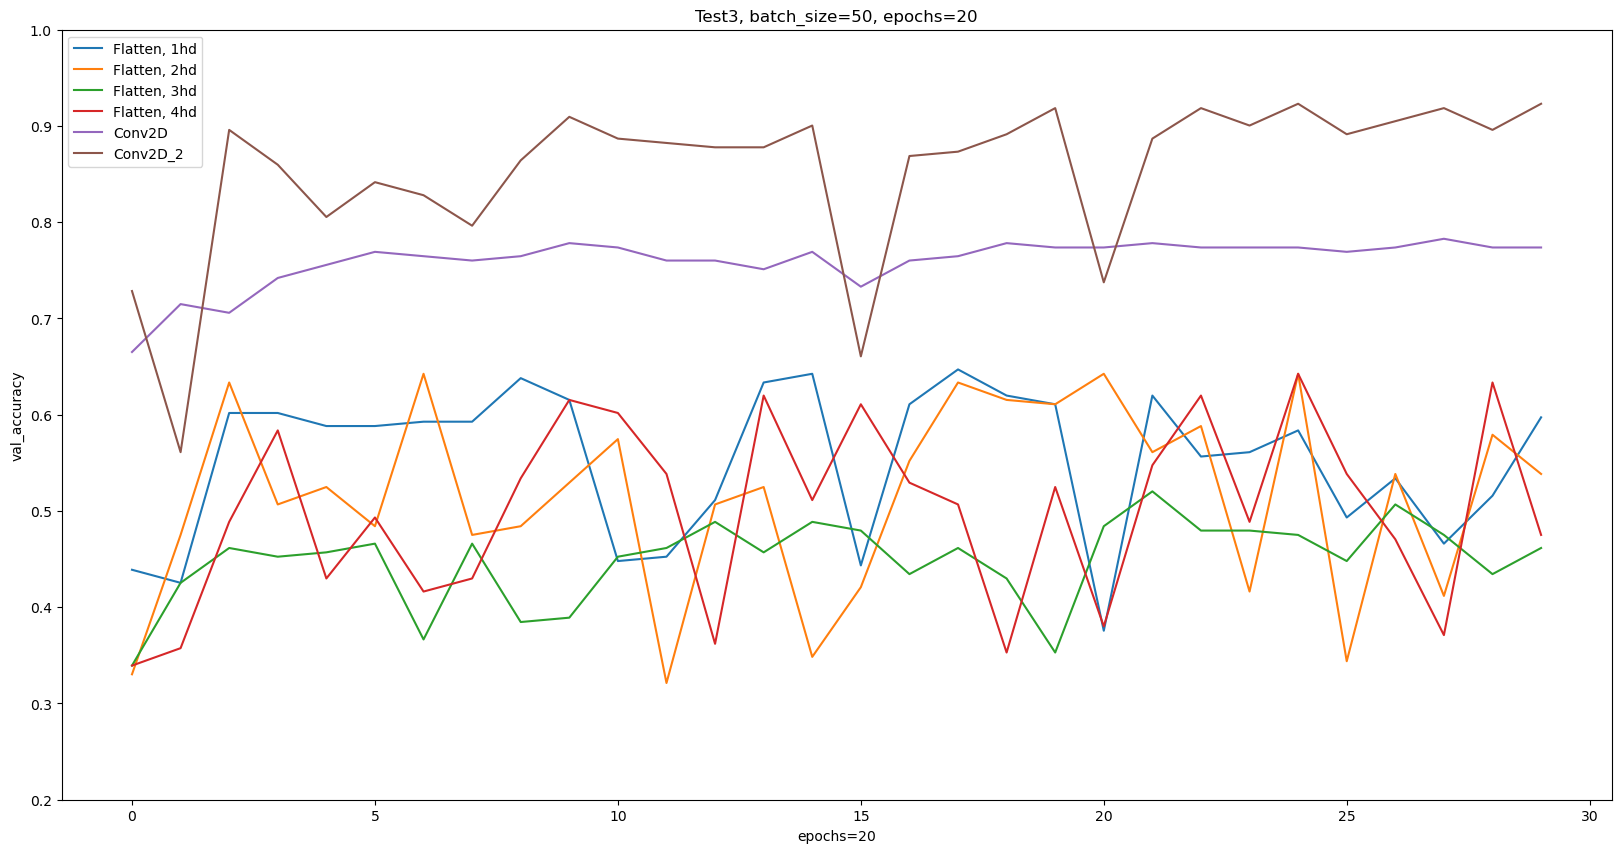

In [40]:
plt.figure(figsize=(20,10))
# plt.plot(hist1.history['val_loss'], label='val_loss1')
# plt.plot(hist2.history['val_loss'], label='val_loss2')
# plt.plot(hist3.history['val_loss'], label='val_loss3')
# plt.plot(hist4.history['val_loss'], label='val_loss4')
plt.plot(hist0.history['val_accuracy'], label='Flatten, 1hd')
plt.plot(hist1.history['val_accuracy'], label='Flatten, 2hd')
plt.plot(hist2.history['val_accuracy'], label='Flatten, 3hd')
plt.plot(hist3.history['val_accuracy'], label='Flatten, 4hd')
plt.plot(hist4.history['val_accuracy'], label='Conv2D')
plt.plot(hist5.history['val_accuracy'], label='Conv2D_2')
plt.ylim(0.2, 1)
plt.title("Test3, batch_size=50, epochs=20")
plt.ylabel("val_accuracy")
plt.xlabel("epochs=20")
plt.legend()




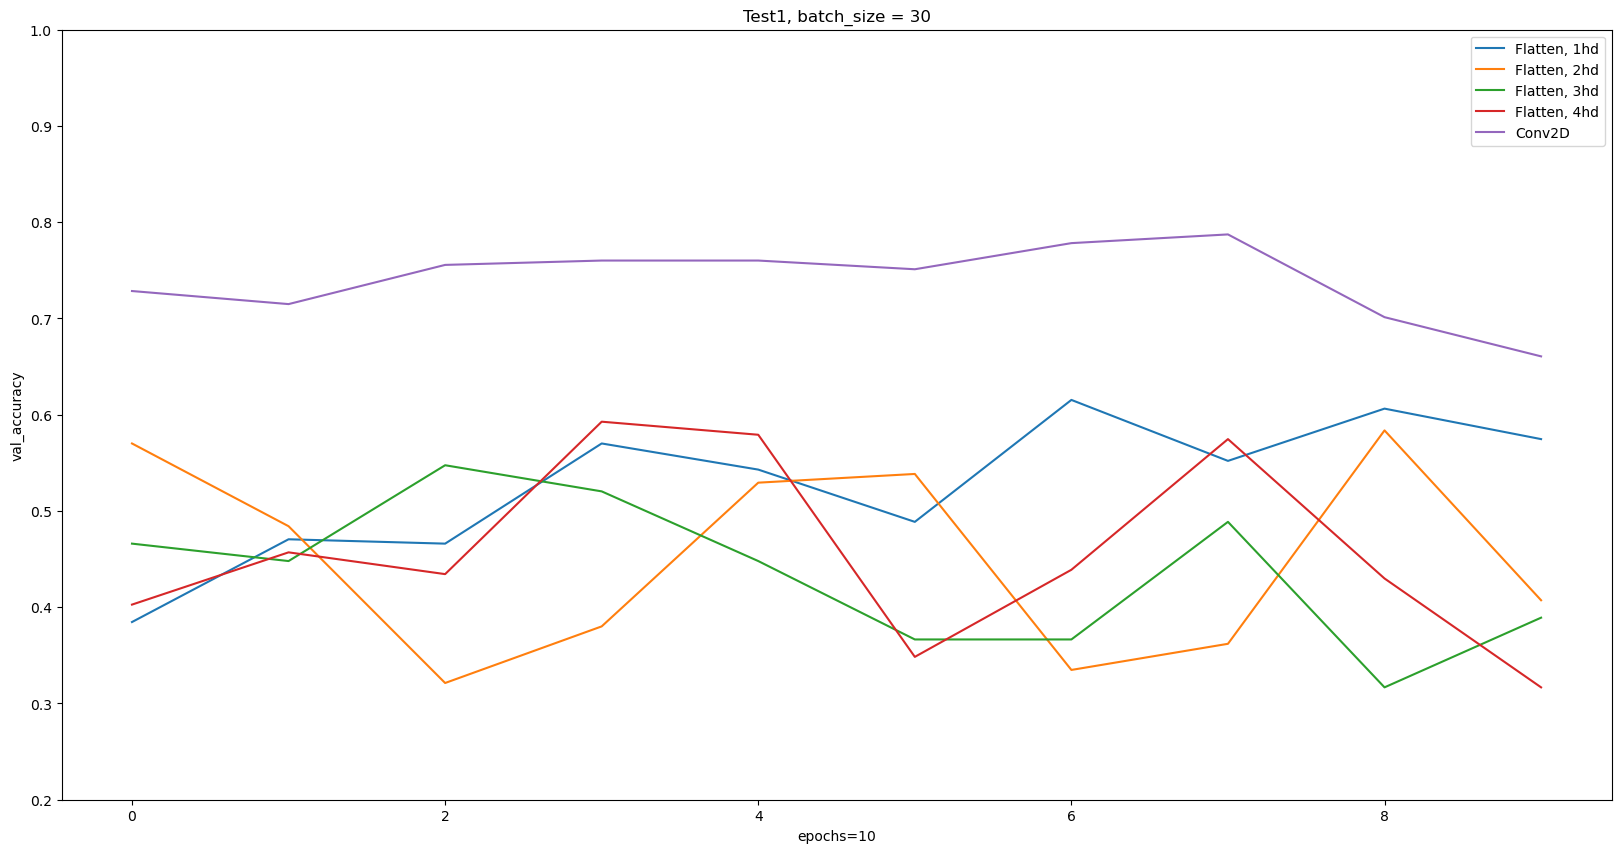

In [41]:
Image('/Users/werther/JupyterImage/1202_batchsize=30.png')

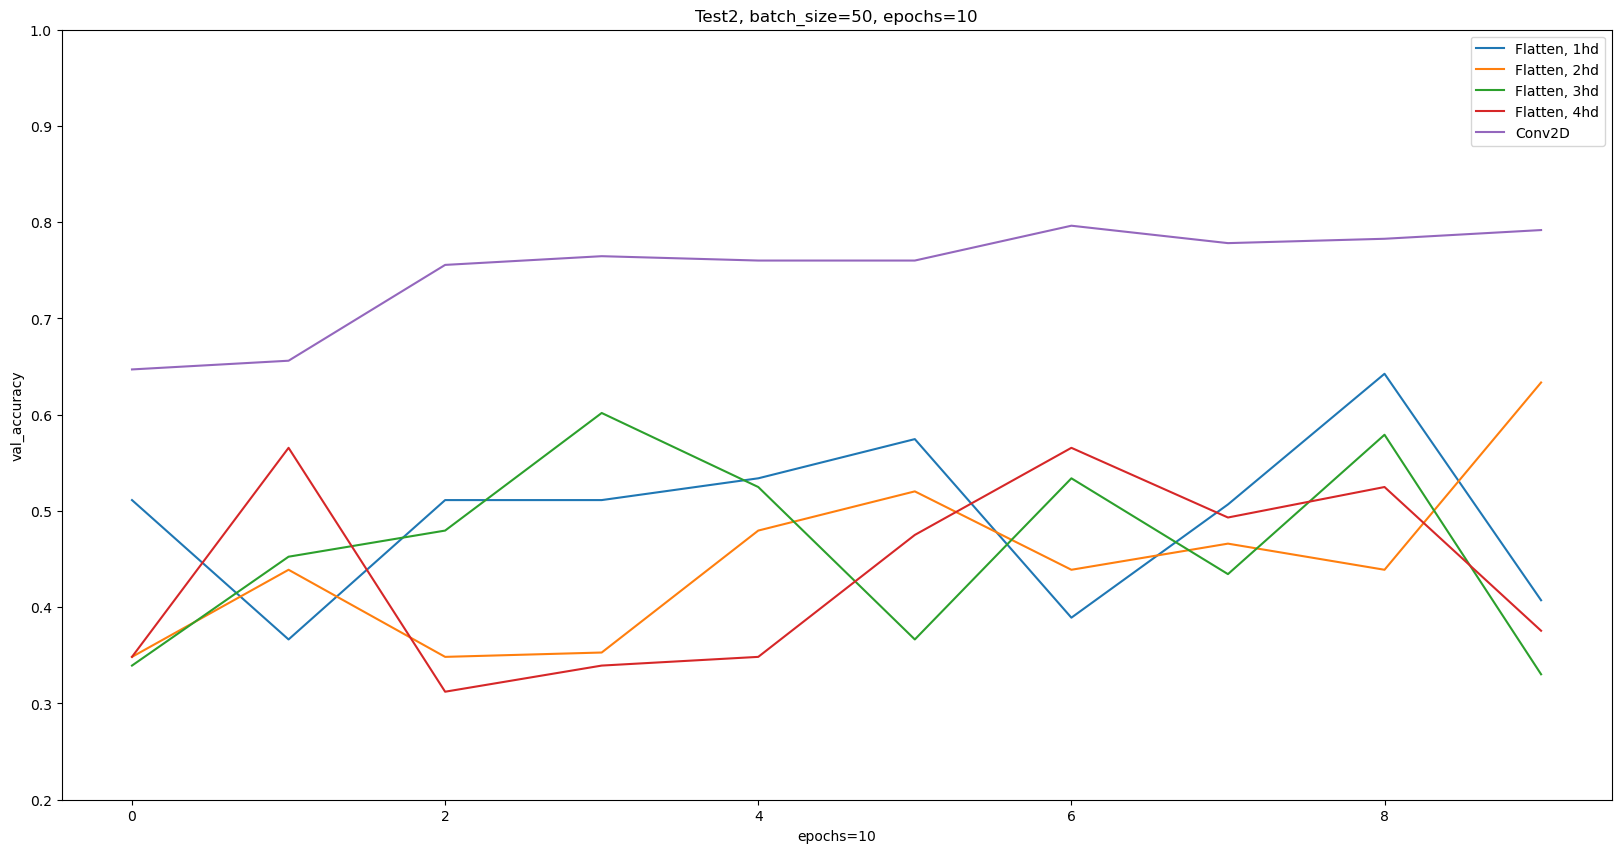

In [42]:
Image('/Users/werther/JupyterImage/Test2, batch_size=50, epochs=10.png')

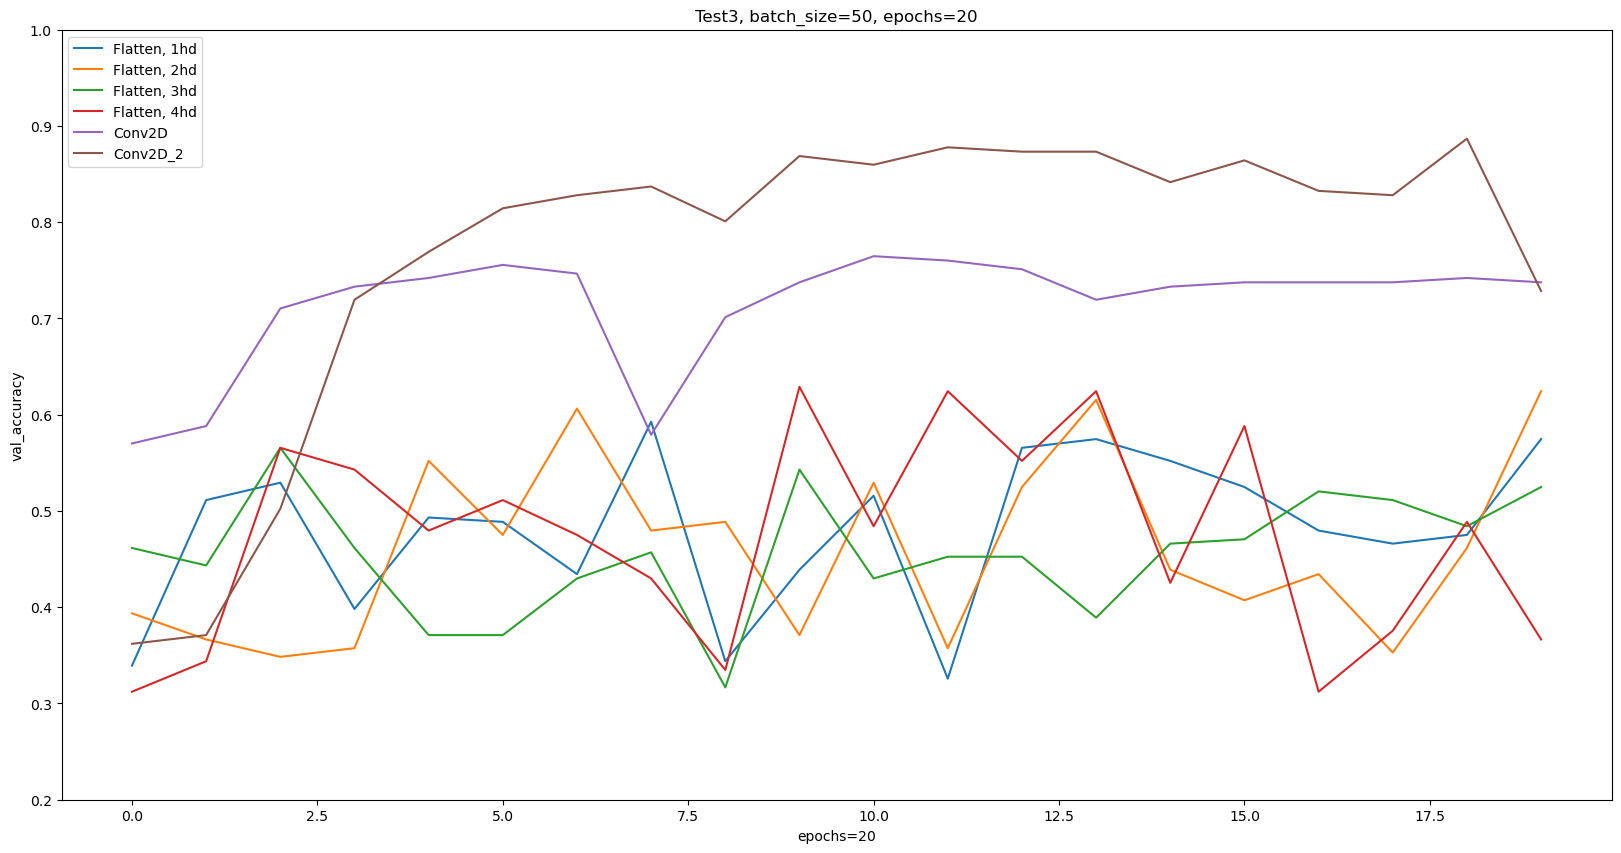

In [43]:
Image('/Users/werther/JupyterImage/Test3, batch_size=50, epochs=20.png')

## Evaluate & Predict

In [34]:
bestMdList = [best_model0, best_model1, best_model2, best_model3, best_model4, best_model5]

for num, model in enumerate(bestMdList):
    mdEval(model, X_test, y_ts)

#  batch_size=30, epochs=10 
# 19/19 [==============================] - 0s 3ms/step - loss: 415.9982 - accuracy: 0.5750
# 19/19 [==============================] - 0s 6ms/step - loss: 208.6603 - accuracy: 0.4069
# 19/19 [==============================] - 0s 6ms/step - loss: 17.5617 - accuracy: 0.3888
# 19/19 [==============================] - 0s 6ms/step - loss: 24.2584 - accuracy: 0.3400
# 19/19 [==============================] - 3s 141ms/step - loss: 4.2935 - accuracy: 0.6492    

#  batch_size=50, epochs=10 
# 19/19 [==============================] - 0s 3ms/step - loss: 1215.9148 - accuracy: 0.4087
# 19/19 [==============================] - 0s 6ms/step - loss: 36.1522 - accuracy: 0.6076
# 19/19 [==============================] - 0s 6ms/step - loss: 293.6107 - accuracy: 0.3291
# 19/19 [==============================] - 0s 6ms/step - loss: 192.7735 - accuracy: 0.3544
# 19/19 [==============================] - 3s 147ms/step - loss: 2.3340 - accuracy: 0.7396

#  batch_size=50, epochs=20 
# 19/19 [==============================] - 0s 3ms/step - loss: 264.5500 - accuracy: 0.5931
# 19/19 [==============================] - 0s 6ms/step - loss: 87.0739 - accuracy: 0.6456
# 19/19 [==============================] - 0s 6ms/step - loss: 99.8764 - accuracy: 0.5136
# 19/19 [==============================] - 0s 6ms/step - loss: 100.9060 - accuracy: 0.4286
# 19/19 [==============================] - 3s 164ms/step - loss: 4.3575 - accuracy: 0.7848
# 19/19 [==============================] - 2s 120ms/step - loss: 0.6331 - accuracy: 0.7486

# 베스트 모델 불러오기.
# 19/19 [==============================] - 0s 4ms/step - loss: 195.0066 - accuracy: 0.6564
# 19/19 [==============================] - 0s 7ms/step - loss: 15.5327 - accuracy: 0.6817
# 19/19 [==============================] - 0s 8ms/step - loss: 1.3543 - accuracy: 0.4756
# 19/19 [==============================] - 0s 8ms/step - loss: 2.4026 - accuracy: 0.6618
# 19/19 [==============================] - 3s 169ms/step - loss: 2.5244 - accuracy: 0.6239
# 19/19 [==============================] - 3s 141ms/step - loss: 0.3056 - accuracy: 0.9620

19/19 [==============================] - 3s 143ms/step - loss: 0.3056 - accuracy: 0.9620


In [ ]:
for num, model in enumerate(mdList):
    globals()[f"pred{num+1}"] = mdPred(model, X_test)

In [35]:
for num, model in enumerate(bestMdList):
    globals()[f"best_pred{num+1}"] = mdPred(model, X_test)

18/18 [==============================] - 3s 146ms/step


# 결과 확인

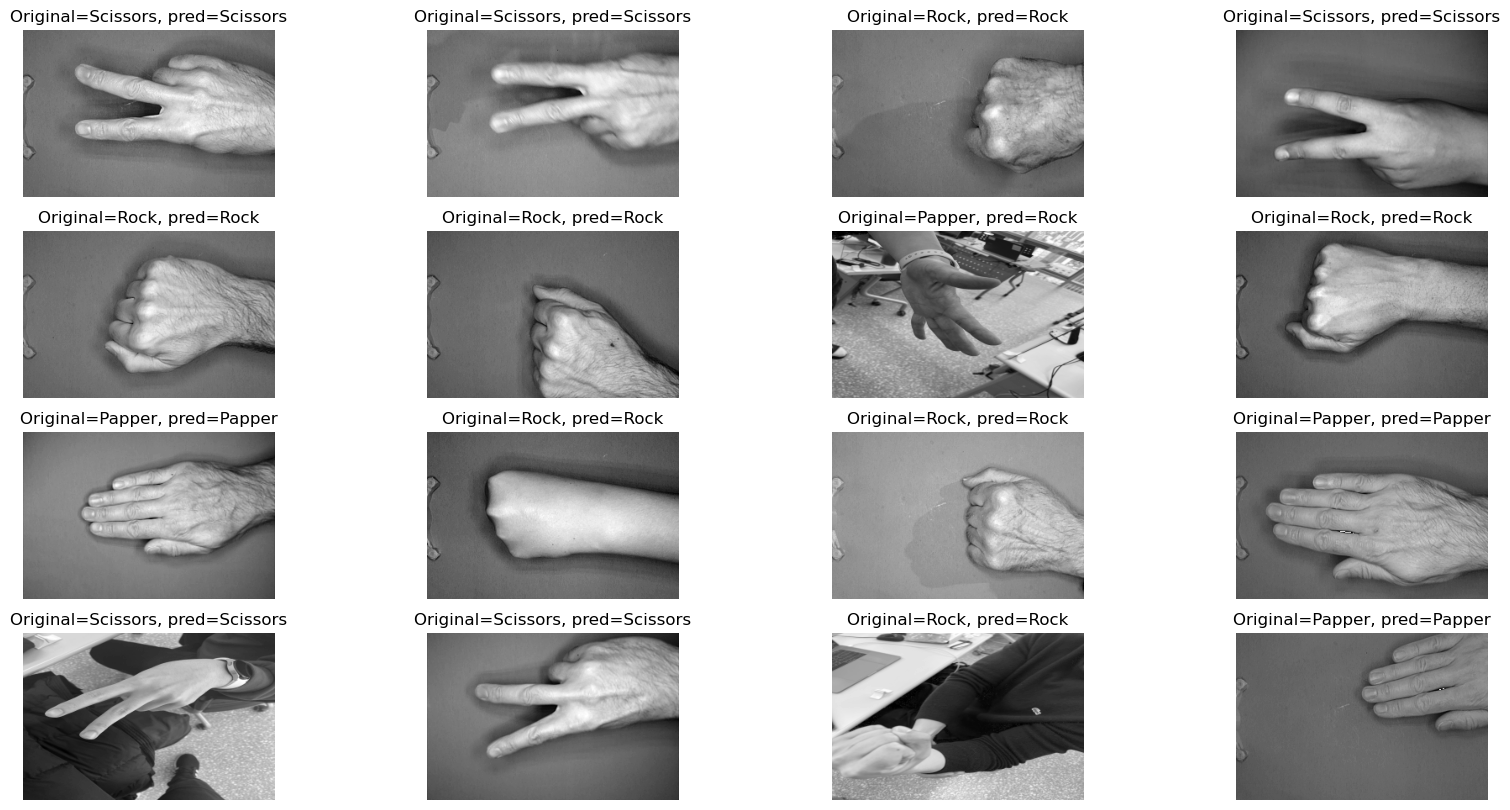

In [39]:
def checkRSP(res) :
#     print(res)     
    if res[0] == 1.0 or res[0] >= 0.9 or res[0] == 1.000000e+00 :
        return "Rock"
    elif res[1] == 1.0 or res[1] >= 0.9 or res[1] == 1.000000e+00:
        return "Scissors"
    elif res[2] == 1.0 or res[2] >= 0.9 or res[2] == 1.000000e+00:
        return "Papper"

def checkRes(x_test, y_test, pred, sNum) :
    src = x_test[sNum-16:sNum]
    y_test = y_test[sNum-16:sNum]
    pred = pred[sNum-16:sNum]
    
    plt.figure(figsize=(20,10))
    
    ax1 = plt.subplot(441)
    ax2 = plt.subplot(442)
    ax3 = plt.subplot(443)
    ax4 = plt.subplot(444)
    ax5 = plt.subplot(445)
    ax6 = plt.subplot(446)
    ax7 = plt.subplot(447)
    ax8 = plt.subplot(448)
    ax9 = plt.subplot(449)
    ax10 = plt.subplot(4,4,10)
    ax11 = plt.subplot(4,4,11)
    ax12 = plt.subplot(4,4,12)
    ax13 = plt.subplot(4,4,13)
    ax14 = plt.subplot(4,4,14)
    ax15 = plt.subplot(4,4,15)
    ax16 = plt.subplot(4,4,16)  
    
    axList = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
    
    for idx, ax in enumerate(axList) :
        ax.imshow(src[idx], cmap='gray')
        ax.axis('off')
        
        og = checkRSP(y_test[idx])
        pred_v = checkRSP(pred[idx])

        ax.set_title(f"Original={og}, pred={pred_v}")
        
    plt.show()
    
checkRes(X_test, y_ts , best_pred6, 150)

In [44]:
tf.__version__

'2.10.0'